Havant is the second safest major town in Hampshire, and is the 30th most dangerous overall out of Hampshire's 268 towns, villages, and cities. The overall crime rate in Havant in 2023 was 93 crimes per 1,000 people. This compares poorly to Hampshire's overall crime rate, coming in 14% higher than the Hampshire rate of 81 per 1,000 daytime population. For England, Wales, and Northern Ireland as a whole, Havant is the 30th safest major town, and the 1,281st most dangerous location out of all towns, cities, and villages.

In January 2024, Havant was the worst major town in Hampshire for drugs, with 35 crimes reported and a crime rate of 0.31 per 1,000 daytime population. January 2024 was also a bad month for Havant residents, when it was Hampshire's most dangerous major town for other crime, recording 14 crimes at a rate of 0.13 per 1,000 daytime population.

The most common crimes in Havant are violence and sexual offences, with 5,092 offences during 2023, giving a crime rate of 46. This is 8% lower than 2022's figure of 5,533 offences and a difference of 3.96 from 2022's crime rate of 50. Havant's least common crime is theft from the person, with 44 offences recorded in 2023, a decrease of 24% from 2022's figure of 58 crimes.

This notebook has a look at the crime stats for all districts in Hampshire as a whole (including 11 districts and two unitary authorities) to see if there are any patterns or interesting insights. We will then home in on Havant to see if we can conclude anything about the crimes reported in this town.

#### Crimes

* Violence and sexual offences - homicide, violence with and without injury, rape and other sexual offences
* Robbery - of business and personal property
* Theft - burglary in dwelling or other building, vehicles, person, bicycle, shoplifting, all others
* Criminal damage and arson
* Drugs - trafficking and possession
* Possession of weapons
* Public order
* Other miscellaneous offences

#### Data Sources:

[Crime Tree](https://assets-hmicfrs.justiceinspectorates.gov.uk/uploads/crime-tree.pdf)

[Hampshire Reported Street Crimes](https://data.police.uk/data/)

[Crime and Safety Havant](https://crimerate.co.uk/hampshire/havant)

[Population - census](https://www.hants.gov.uk/landplanningandenvironment/facts-figures/population/2021-census)

[Economic Indicators](https://www.plumplot.co.uk/Hampshire-salary-and-unemployment.html)


# Import data

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from mpl_toolkits.basemap import Basemap
import folium
from folium import plugins
import warnings

In [455]:
warnings.filterwarnings("ignore")

In [270]:
# Set path to get data
path = r'C:\Users\imoge\Downloads\HantsCrime'

all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

In [271]:
# Check we have picked up all the files
len(li)

36

In [272]:
# Concat into a dataframe and get the shape
df = pd.concat(li, axis=0, ignore_index=True)
df.shape

(565163, 12)

In [273]:
df.head()

Crime ID    Month  \
0                                                NaN  2021-04   
1  1e89d22ab70b2fca40c73246e918b7768dbbd747aa23c4...  2021-04   
2  9ff12e79f8783d9b1d5384db940203c45b4fb0a0368132...  2021-04   
3  79c56665e645643bdbd3d563b923f51c1fd3ac059a0d9e...  2021-04   
4  cf9c98dd82e6e121c3e255ce7b0d995ebf1062c5623684...  2021-04   

              Reported by            Falls within  Longitude   Latitude  \
0  Hampshire Constabulary  Hampshire Constabulary  -1.147727  51.353443   
1  Hampshire Constabulary  Hampshire Constabulary  -1.147940  51.355909   
2  Hampshire Constabulary  Hampshire Constabulary  -1.147940  51.355909   
3  Hampshire Constabulary  Hampshire Constabulary  -1.146700  51.353067   
4  Hampshire Constabulary  Hampshire Constabulary  -1.147940  51.355909   

                         Location  LSOA code                   LSOA name  \
0          On or near The Beeches  E01022553  Basingstoke and Deane 001A   
1        On or near Bishops Close  E01022553  Basingstoke and Deane 001A   
2        On or near Bishops Close  E01022553  Basingstoke and Deane 001A   
3  On or near Carrington Crescent  E01022553  Basingstoke and Deane 001A   
4        On or near Bishops Close  E01022553  Basingstoke and Deane 001A   

                     Crime type  \
0         Anti-social behaviour   
1  Violence and sexual offences   
2  Violence and sexual offences   
3  Violence and sexual offences   
4  Violence and sexual offences   

                           Last outcome category  Context  
0                                            NaN      NaN  
1                    Unable to prosecute suspect      NaN  
2                    Unable to prosecute suspect      NaN  
3  Investigation complete; no suspect identified      NaN  
4                    Unable to prosecute suspect      NaN

# Data Cleaning

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565163 entries, 0 to 565162
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               495724 non-null  object 
 1   Month                  565163 non-null  object 
 2   Reported by            565163 non-null  object 
 3   Falls within           565163 non-null  object 
 4   Longitude              565163 non-null  float64
 5   Latitude               565163 non-null  float64
 6   Location               565163 non-null  object 
 7   LSOA code              565163 non-null  object 
 8   LSOA name              565163 non-null  object 
 9   Crime type             565163 non-null  object 
 10  Last outcome category  495724 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 51.7+ MB


In [275]:
# Check nulls
df.isnull().sum()

Crime ID                  69439
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA code                     0
LSOA name                     0
Crime type                    0
Last outcome category     69439
Context                  565163
dtype: int64

In [276]:
# What values do we have in this category
df['Last outcome category'].unique()

array([nan, 'Unable to prosecute suspect',
       'Investigation complete; no suspect identified',
       'Status update unavailable', 'Local resolution',
       'Offender given a caution',
       'Further action is not in the public interest',
       'Awaiting court outcome', 'Court result unavailable',
       'Further investigation is not in the public interest',
       'Formal action is not in the public interest',
       'Action to be taken by another organisation',
       'Suspect charged as part of another case', 'Under investigation'],
      dtype=object)

It is not entirely clear why there are so many blanks as there is a category for 'under investigation' and it might be assumed that there should be an outcome for all cases

In [277]:
# Lets drop a few columns of no interest
df = df.drop(columns = ['Crime ID','Reported by','Falls within','Context'],axis = 1)

In [278]:
# Change the name of the Month column to date and then replace with a datetime object 
df.rename(columns = {'Month':'Date'},inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.month_name()

# Drop the date column
df.drop(columns = ['Date'],axis = 1, inplace = True)

In [279]:
df.head()

Longitude   Latitude                        Location  LSOA code  \
0  -1.147727  51.353443          On or near The Beeches  E01022553   
1  -1.147940  51.355909        On or near Bishops Close  E01022553   
2  -1.147940  51.355909        On or near Bishops Close  E01022553   
3  -1.146700  51.353067  On or near Carrington Crescent  E01022553   
4  -1.147940  51.355909        On or near Bishops Close  E01022553   

                    LSOA name                    Crime type  \
0  Basingstoke and Deane 001A         Anti-social behaviour   
1  Basingstoke and Deane 001A  Violence and sexual offences   
2  Basingstoke and Deane 001A  Violence and sexual offences   
3  Basingstoke and Deane 001A  Violence and sexual offences   
4  Basingstoke and Deane 001A  Violence and sexual offences   

                           Last outcome category  Year  Month Month Name  
0                                            NaN  2021      4      April  
1                    Unable to prosecute suspect  2021      4      April  
2                    Unable to prosecute suspect  2021      4      April  
3  Investigation complete; no suspect identified  2021      4      April  
4                    Unable to prosecute suspect  2021      4      April

In [280]:
df.tail()

Longitude   Latitude                       Location  LSOA code  \
565158  -1.040917  50.881798          On or near Carey Lane  E01034734   
565159  -1.047425  50.877058     On or near Newlands Avenue  E01034734   
565160  -1.048837  50.871224  On or near Marrelsmoor Avenue  E01034734   
565161  -1.048837  50.871224  On or near Marrelsmoor Avenue  E01034734   
565162  -0.968508  51.361076            On or near Sun Lane  E01016690   

              LSOA name                    Crime type  \
565158  Winchester 014G  Violence and sexual offences   
565159  Winchester 014G  Violence and sexual offences   
565160  Winchester 014G  Violence and sexual offences   
565161  Winchester 014G  Violence and sexual offences   
565162   Wokingham 017C                  Public order   

                                Last outcome category  Year  Month Month Name  
565158                    Unable to prosecute suspect  2024      3      March  
565159                    Unable to prosecute suspect  2024      3      March  
565160  Investigation complete; no suspect identified  2024      3      March  
565161                            Under investigation  2024      3      March  
565162  Investigation complete; no suspect identified  2024      3      March

We have data from April 2021 through to March 2024, so we have two years of complete data, one year with nine months and one year with just three months. We will focus in on 2022 and 2023 and drop the rest of the data from the dataset. We will then be able to average these two years if required.

In [281]:
# Get data for 2022 and 2023
df2 = df[(df['Year']==2022) | (df['Year']==2023)]
df2.shape

(373440, 10)

In [282]:
# What unique LSOA names do we have?
df2['LSOA name'].unique()

array(['Basingstoke and Deane 001A', 'Basingstoke and Deane 001B',
       'Basingstoke and Deane 001C', ...,
       'Bournemouth, Christchurch and Poole 019C', 'Dorset 007B',
       'Surrey Heath 010B'], dtype=object)

It seems as if we have some LSOA names that are not Hampshire. We are interested in those that relate to Hampshire only. Lets have a look at one of these other ones.

In [283]:
# Check one of them
df2[df2['LSOA name']=='Guildford 004C']

Longitude  Latitude                   Location  LSOA code  \
336435  -0.728433  51.27784  On or near Stratford Road  E01030428   

             LSOA name     Crime type  \
336435  Guildford 004C  Bicycle theft   

                                Last outcome category  Year  Month Month Name  
336435  Investigation complete; no suspect identified  2022     12   December

Lower Layer Super Output Areas (LSOAs): LSOAs have an average population of 1500 people or 650 households. A lot more data is available directly at LSOA level, including the majority of the data included within our tool, Local Insight.

In [284]:
# how many unique codes do we have?
len(list(df2['LSOA code'].unique()))

1326

#### Districts:

* Basingstoke & Deane Borough Council
* East Hampshire District Council
* Eastleigh Borough Council
* Fareham Borough Council
* Gosport Borough Council
* Hart District Council
* Havant Borough Council
* New Forest District Council
* Portsmouth City Council
* Rushmoor Borough Council
* Southampton City Council
* Test Valley Borough Council
* Winchester City Council

We can look up the LSOA codes for each of these from [here](https://geoportal.statistics.gov.uk/datasets/2e39aa3a802d482f8914feee243688f2_0/explore)

In [285]:
# Read in the LSOA code list file
code_list = pd.read_csv(r'C:\Users\imoge\Downloads\LSOAcodes.csv')
code_list.head(2)

LSOA11CD     LSOA11NM   LSOA21CD     LSOA21NM    LAD22CD LAD22NM LAD22NMW  \
0  E01000155  Barnet 030D  E01033916  Barnet 042B  E09000003  Barnet      NaN   
1  E01000305  Barnet 036B  E01000305  Barnet 036B  E09000003  Barnet      NaN   

   ObjectId  
0         1  
1         2

In [286]:
# Check one of the districts
code_list[code_list['LSOA11NM'].str.contains('Basingstoke')].head()

LSOA11CD                    LSOA11NM   LSOA21CD  \
21603  E01022552  Basingstoke and Deane 014E  E01022552   
21625  E01022553  Basingstoke and Deane 001A  E01022553   
21630  E01022554  Basingstoke and Deane 001B  E01022554   
21636  E01022555  Basingstoke and Deane 001C  E01022555   
21642  E01022556  Basingstoke and Deane 001D  E01022556   

                         LSOA21NM    LAD22CD                LAD22NM LAD22NMW  \
21603  Basingstoke and Deane 014E  E07000084  Basingstoke and Deane      NaN   
21625  Basingstoke and Deane 001A  E07000084  Basingstoke and Deane      NaN   
21630  Basingstoke and Deane 001B  E07000084  Basingstoke and Deane      NaN   
21636  Basingstoke and Deane 001C  E07000084  Basingstoke and Deane      NaN   
21642  Basingstoke and Deane 001D  E07000084  Basingstoke and Deane      NaN   

       ObjectId  
21603     21604  
21625     21626  
21630     21631  
21636     21637  
21642     21643

In [287]:
# Get the codes for each district [We add in a space for Hart so we don't pick up Hartlepool]
basingstoke = list(code_list[code_list['LSOA11NM'].str.contains('Basingstoke')]['LSOA11CD'].unique())
easthants = list(code_list[code_list['LSOA11NM'].str.contains('East Hamp')]['LSOA11CD'].unique())
eastleigh = list(code_list[code_list['LSOA11NM'].str.contains('Eastleigh')]['LSOA11CD'].unique())
fareham = list(code_list[code_list['LSOA11NM'].str.contains('Fareham')]['LSOA11CD'].unique())
gosport = list(code_list[code_list['LSOA11NM'].str.contains('Gosport')]['LSOA11CD'].unique())
havant = list(code_list[code_list['LSOA11NM'].str.contains('Havant')]['LSOA11CD'].unique())
newf = list(code_list[code_list['LSOA11NM'].str.contains('New Forest')]['LSOA11CD'].unique())
ports = list(code_list[code_list['LSOA11NM'].str.contains('Portsmouth')]['LSOA11CD'].unique())
rush = list(code_list[code_list['LSOA11NM'].str.contains('Rushmoor')]['LSOA11CD'].unique())
south = list(code_list[code_list['LSOA11NM'].str.contains('Southampton')]['LSOA11CD'].unique())
test = list(code_list[code_list['LSOA11NM'].str.contains('Test Valley')]['LSOA11CD'].unique())
winch = list(code_list[code_list['LSOA11NM'].str.contains('Winchester')]['LSOA11CD'].unique())
hart = list(code_list[code_list['LSOA11NM'].str.contains('Hart ')]['LSOA11CD'].unique())

# Add them into one list
districts = basingstoke + easthants + eastleigh + fareham + gosport + havant + newf + ports + rush + south + test + winch + hart

In [288]:
# Filter the dataframe against this list to give us just the LSOAs we are interested in
df_filtered = df2[df2['LSOA code'].isin(districts)]
df_filtered.shape

(338917, 10)

Some of the questions/issues we might want to ask/investigate based on the data:

* crimes by location (LSOA area and latitude/longitude
* types of crimes in the county overall and by area
* types of crimes by date of report
* outcomes for crimes for the county and by area

## Types of crimes

In [289]:
# Get unique types of crime
df_filtered['Crime type'].unique()

array(['Other theft', 'Public order', 'Violence and sexual offences',
       'Anti-social behaviour', 'Drugs', 'Shoplifting',
       'Theft from the person', 'Criminal damage and arson',
       'Possession of weapons', 'Burglary', 'Vehicle crime',
       'Other crime', 'Bicycle theft', 'Robbery'], dtype=object)

We have 14 categories of crime which we can consolidate a bit to make analysis easier. 

In [290]:
pd.options.mode.chained_assignment = None

# Combine some categories
df_filtered['Crime type'].replace({'Other theft':'Theft', 
                                   'Bicycle theft':'Theft', 
                                   'Theft from the person':'Theft',
                                   'Public order':'Anti-social & Public Order',
                                   'Anti-social behaviour':'Anti-social & Public Order',
                                   'Robbery':'Burglary & Robbery',
                                   'Burglary':'Burglary & Robbery'},inplace = True)

In [291]:
# Groupby crime type
crimes = df_filtered.groupby(['Crime type'],as_index = False)['Year'].count().sort_values(by = 'Year',ascending = False)
crimes['Average'] = crimes['Year']/2
crimes['%'] = crimes['Average']/crimes['Average'].sum()*100
crimes

Crime type    Year  Average          %
9  Violence and sexual offences  135941  67970.5  40.110411
0    Anti-social & Public Order   73215  36607.5  21.602634
7                         Theft   28246  14123.0   8.334194
2     Criminal damage and arson   27214  13607.0   8.029695
6                   Shoplifting   20117  10058.5   5.935672
8                 Vehicle crime   19938   9969.0   5.882856
1            Burglary & Robbery   16973   8486.5   5.008011
3                         Drugs    8785   4392.5   2.592080
4                   Other crime    4624   2312.0   1.364346
5         Possession of weapons    3864   1932.0   1.140102

The most commonly occurring crime is violence and sexual offences, with an average of almost 68000 per year accounting for 40% of the total.

violent and sexual crimes include: domestic abuse, rape, sexual offences, stalking, harassment, so-called 'honour-based' violence including forced marriage, female genital mutilation, child abuse, human trafficking focusing on sexual exploitation, prostitution, pornography and obscenity.

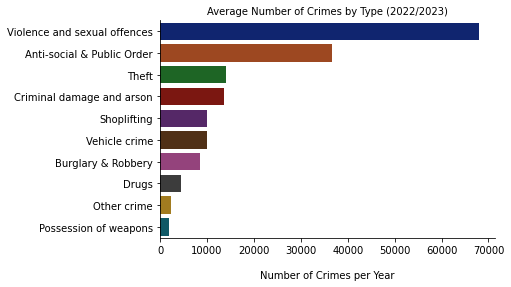

In [292]:
# Plot the crimes across the county for the two year period
ax = sns.barplot(data = crimes, y = 'Crime type', x = 'Average', palette = 'dark')
plt.title('Average Number of Crimes by Type (2022/2023)', fontsize = 10)
plt.ylabel("")
plt.xlabel("Number of Crimes per Year", labelpad = 15)
ax.spines[['right', 'top']].set_visible(False);

We can see that violence is the biggest category by far and possession of weapons is the smallest of the reported crimes

In [293]:
df_filtered.head()

Longitude   Latitude                Location  LSOA code  \
151109  -1.144834  51.353800    On or near Stanfield  E01022553   
151110  -1.151854  51.357016  On or near Supermarket  E01022554   
151111  -1.153329  51.357269  On or near The Burrows  E01022554   
151112  -1.141741  51.354829   On or near The Parade  E01022555   
151113  -1.140079  51.350798  On or near Maple Grove  E01022555   

                         LSOA name                    Crime type  \
151109  Basingstoke and Deane 001A                         Theft   
151110  Basingstoke and Deane 001B    Anti-social & Public Order   
151111  Basingstoke and Deane 001B  Violence and sexual offences   
151112  Basingstoke and Deane 001C    Anti-social & Public Order   
151113  Basingstoke and Deane 001C    Anti-social & Public Order   

              Last outcome category  Year  Month Month Name  
151109  Unable to prosecute suspect  2022      1    January  
151110             Local resolution  2022      1    January  
151111  Unable to prosecute suspect  2022      1    January  
151112                          NaN  2022      1    January  
151113                          NaN  2022      1    January

## Types of crimes by year

In [294]:
# Does this vary by year?
crimes_year = df_filtered.groupby(['Year','Crime type'],as_index = False)['Month'].count().pivot(index = 'Crime type',
                                                                                                columns = 'Year',
                                                                                                values = 'Month')
crimes_year['%change'] = round((crimes_year[2023] - crimes_year[2022])/crimes_year[2022]*100,1)
crimes_year.sort_values(by = '%change',ascending = False)

Year                           2022   2023  %change
Crime type                                         
Shoplifting                    8632  11485     33.1
Drugs                          4348   4437      2.0
Possession of weapons          1979   1885     -4.7
Vehicle crime                 10395   9543     -8.2
Other crime                    2446   2178    -11.0
Criminal damage and arson     14553  12661    -13.0
Theft                         15194  13052    -14.1
Violence and sexual offences  73700  62241    -15.5
Burglary & Robbery             9453   7520    -20.4
Anti-social & Public Order    41339  31876    -22.9

This table highlights some interesting changes between 2022 and 2023. Shoplifting as a crime has seen a 33% increase in reports whereas all of the other crimes bar drugs have reduced over the period.

This is interesting as anecdotally, shops in my local town have been reporting significant increases in shoplifting, with one shop off-licence locking doors and only opening them when a customer approaches.

In the nearest city, this increase has been reported in the news and it would be interesting to have a look at which towns and cities are impacted by this the most.

[Portsmouth News Article](https://www.portsmouth.co.uk/news/crime/huge-spike-in-portsmouth-shoplifting-as-reports-to-police-nearly-double-leaving-workers-living-in-fear-4358372)

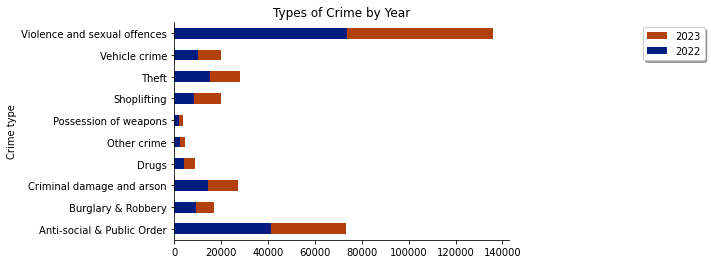

In [295]:
# Plot chart
sns.set_palette('dark')
ax = crimes_year[[2022,2023]].plot(kind = 'barh',stacked = True)

# Add titles
plt.title('Types of Crime by Year')
plt.xlabel("")

# Remove frames
ax.spines[['right', 'top']].set_visible(False)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='upper right', bbox_to_anchor=(1.6, 1),
          ncol=1, fancybox=True, shadow=True);


## Types of crimes by month

Does the pattern of total crime vary by month?

Does the pattern of different types of crime vary by month?

In [296]:
months = list(df_filtered['Month Name'].unique())
crime_month = df_filtered.groupby(['Month'],as_index = False)['Year'].count()
crime_month.index = months
crime_month['Average'] = crime_month['Year']/2
crime_month.sort_values(by = 'Average',ascending = False)

Month   Year  Average
May            5  30558  15279.0
March          3  30271  15135.5
July           7  30112  15056.0
June           6  29381  14690.5
August         8  29182  14591.0
April          4  28819  14409.5
January        1  28085  14042.5
October       10  28068  14034.0
September      9  27945  13972.5
February       2  27156  13578.0
November      11  26088  13044.0
December      12  23252  11626.0

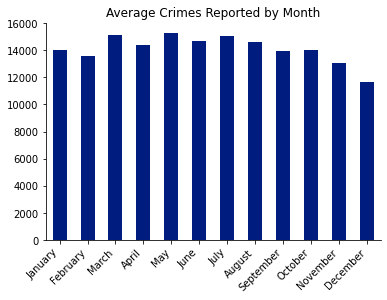

In [297]:
# Plot crimes by month
ax = crime_month['Average'].plot(kind = 'bar')
plt.title('Average Crimes Reported by Month')

# Remove frames
ax.spines[['right', 'top']].set_visible(False)

# Legend
ax.legend_ = None
plt.xticks(rotation=45, ha='right');

There is no significant pattern, other than we can see that total reported crimes are highest in May and lowest in December.

We can see if there are any noticeable patterns with regard to types of crime by month

In [298]:
# Groupby month and type
crime_month_type = df_filtered.groupby(['Month','Crime type'],as_index = False)['Year'].count()
crime_month_type['Average'] = crime_month_type['Year']/2
crime_month_type

Month                    Crime type  Year  Average
0        1    Anti-social & Public Order  5572   2786.0
1        1            Burglary & Robbery  1524    762.0
2        1     Criminal damage and arson  2157   1078.5
3        1                         Drugs   750    375.0
4        1                   Other crime   429    214.5
..     ...                           ...   ...      ...
115     12         Possession of weapons   251    125.5
116     12                   Shoplifting  1549    774.5
117     12                         Theft  2160   1080.0
118     12                 Vehicle crime  1550    775.0
119     12  Violence and sexual offences  9583   4791.5

[120 rows x 4 columns]

In [299]:
# Create pivot table
crime_month_type = crime_month_type.pivot(index = 'Month', columns = 'Crime type', values = 'Average')
crime_month_type.index = months
crime_month_type

Crime type  Anti-social & Public Order  Burglary & Robbery  \
January                         2786.0               762.0   
February                        2786.0               686.5   
March                           3168.0               727.0   
April                           3276.0               698.0   
May                             3658.0               623.5   
June                            3514.0               665.5   
July                            3734.5               675.5   
August                          3515.0               708.0   
September                       3001.0               781.0   
October                         2911.5               742.5   
November                        2275.0               804.0   
December                        1982.5               613.0   

Crime type  Criminal damage and arson  Drugs  Other crime  \
January                        1078.5  375.0        214.5   
February                       1129.5  340.0        202.0   
March                          1239.0  385.0        230.5   
April                          1195.5  337.0        195.5   
May                            1271.0  411.5        195.5   
June                           1158.5  346.0        194.5   
July                           1158.5  365.0        209.0   
August                         1128.0  395.5        167.5   
September                      1039.5  333.5        184.5   
October                        1167.5  381.0        178.0   
November                       1083.5  364.5        173.0   
December                        958.0  358.5        167.5   

Crime type  Possession of weapons  Shoplifting   Theft  Vehicle crime  \
January                     135.5        773.0  1061.0          928.5   
February                    156.5        764.5  1133.0          825.5   
March                       178.5        849.0  1222.5          816.5   
April                       151.5        877.5  1163.0          821.0   
May                         186.5        863.5  1198.5          737.5   
June                        167.0        809.5  1188.5          772.5   
July                        170.5        929.5  1226.0          747.0   
August                      167.5        937.0  1243.0          855.0   
September                   174.0        804.5  1193.5          851.5   
October                     178.5        827.5  1220.5          960.5   
November                    140.5        848.5  1193.5          878.5   
December                    125.5        774.5  1080.0          775.0   

Crime type  Violence and sexual offences  
January                           5928.5  
February                          5554.5  
March                             6319.5  
April                             5694.5  
May                               6133.5  
June                              5874.5  
July                              5840.5  
August                            5474.5  
September                         5609.5  
October                           5466.5  
November                          5283.0  
December                          4791.5

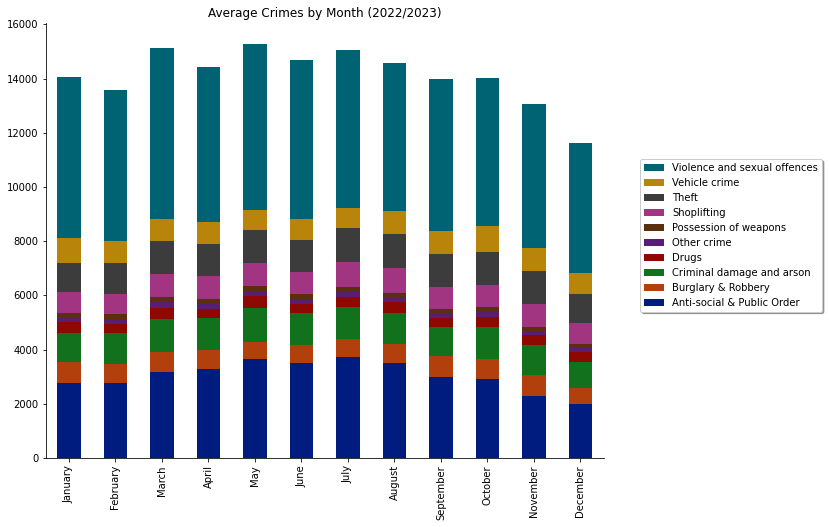

In [300]:
# Plot the data
sns.set_palette('dark')

# Plot
fig, ax = plt.subplots(figsize = (10,8))
crime_month_type.plot(ax = ax, kind = 'bar',stacked = True)

# Title
plt.title("Average Crimes by Month (2022/2023)")

# Remove frames
ax.spines[['right', 'top']].set_visible(False)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='upper right', bbox_to_anchor=(1.4, 0.7),
          ncol=1, fancybox=True, shadow=True);


* We can see an increase in anti-social and public order offences reported during the summer months which declines over the year
* Violence and sexual offences also reduce

We can see this a little better if we plot each of these crime types separately

In [301]:
def plot_line_charts(df):
    
    columns = df.columns[:10]  # Select the first 10 columns from the dataframe
    
    for column in columns:
        plt.figure(figsize = (15,4))
        plt.plot(df.index, df[column])
        plt.title(f" {column}")
        plt.xlabel("Months", labelpad = 10)
        plt.ylabel("Average Number", labelpad = 10)
        plt.show()


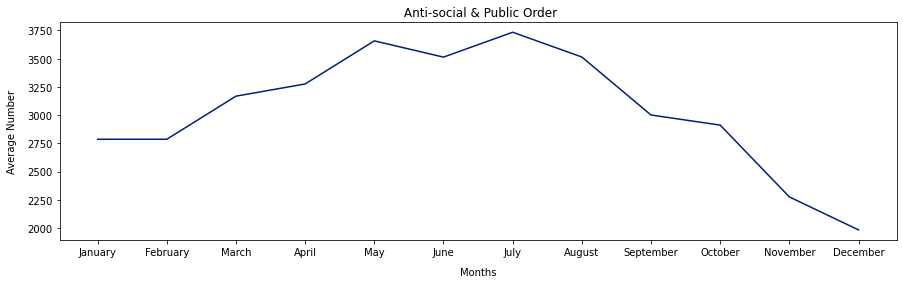

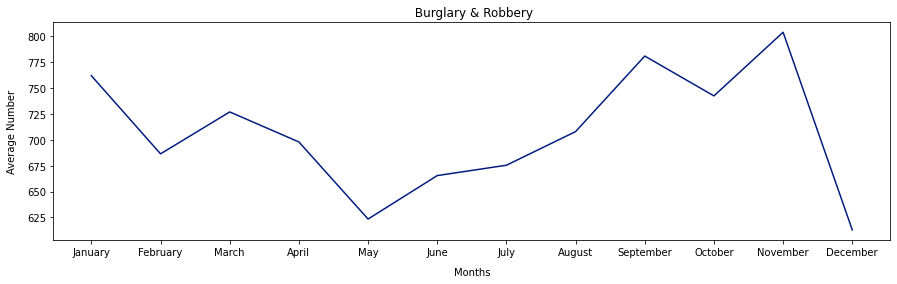

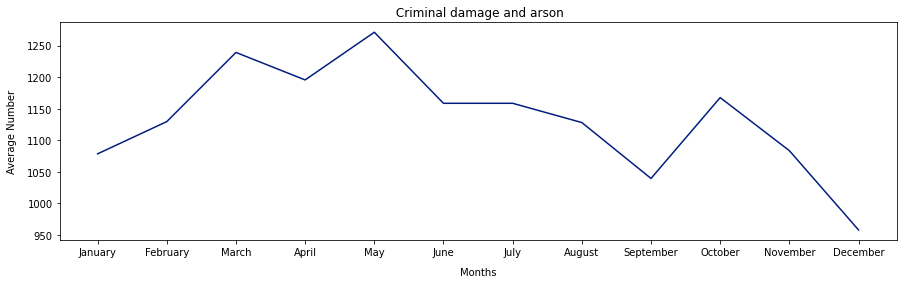

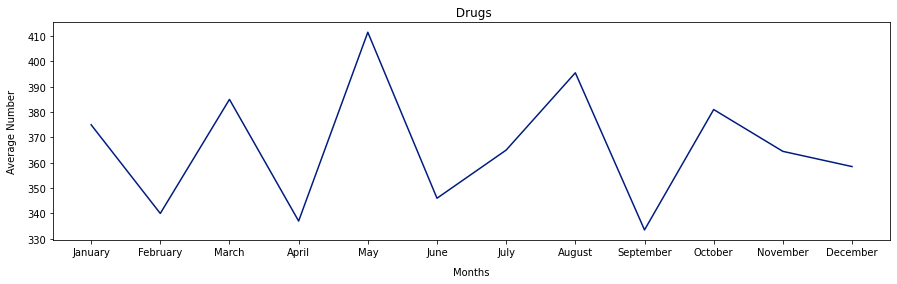

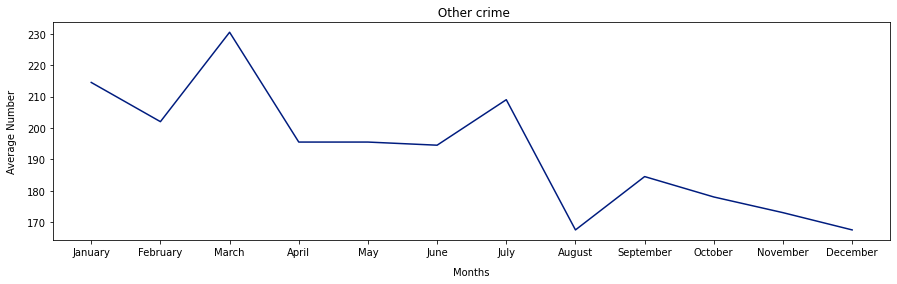

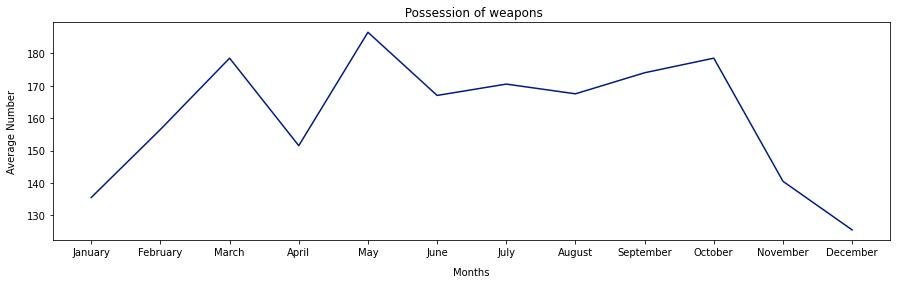

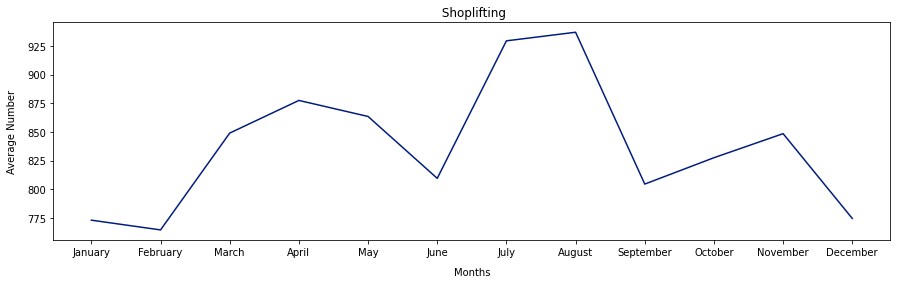

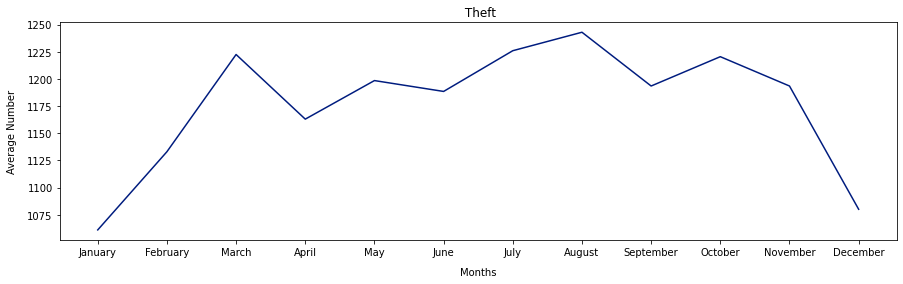

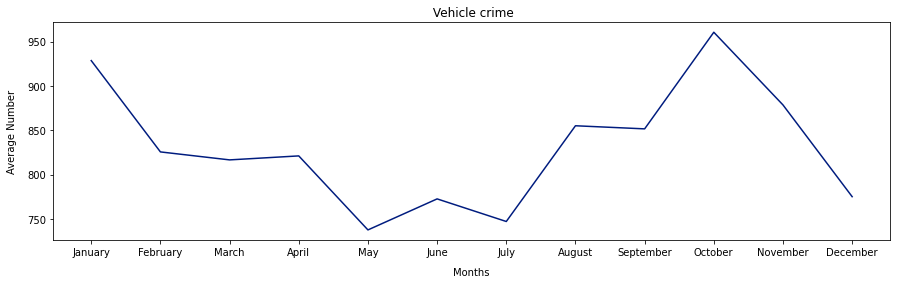

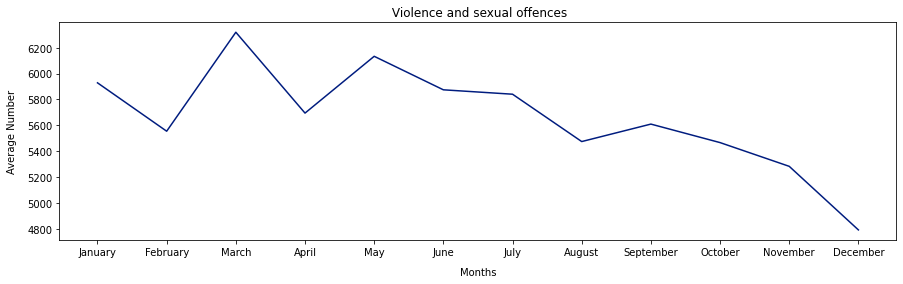

In [302]:
plot_line_charts(crime_month_type)

#### Pattern of crimes by month:

* Anti-social and public order increases over the summer and then decreases into the winter. This might align with protests and riots occurring over the better summer weather, increased drinking out of the home over the summer etc.
* Burglary & Robbery hits a low point in May and then increases gradually over the rest of the year to a peak in November prior to the Christmas period
* Criminal damage and arson is highest in May as the weather increases with another peak in October. These might coincide with holiday periods.
* Drugs crime has a distinct cyclical pattern peaking in March, May, August and October, possibly in line with school holidays
* Other crime - no comments
* Possession of weapons has similar peaks as drug crime but without the dips, again indicating possible association with drug crime
* Shoplifting has peaks in April, over the summer and a smaller increase in November. Some of this might be associated with school holidays at Easter, Summer and prior to Christmas.
* Theft increases in January through to March and then remains high over the summer and autumn only dipping in December. 
* Vehicle crime is at a peak in October and much lower over the summer, which might be related to break-ins to steal items bought for Christmas and left in the car
* Violence and sexual offences appear to peak in March and then decline over the rest of the year.

## Crimes by district

To analyse the crimes by district, we can filter by the LSOA codes we used earlier.

In [303]:
# Add a district column
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Basingstoke')), 'District'] = 'Basingstoke' 
df_filtered.loc[(df_filtered['LSOA name'].str.contains('East Hamp')), 'District'] = 'East Hampshire'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Eastleigh')), 'District'] = 'Eastleigh'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Fareham')), 'District'] = 'Fareham'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Gosport')), 'District'] = 'Gosport'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Havant')), 'District'] = 'Havant'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('New Forest')), 'District'] = 'New Forest'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Portsmouth')), 'District'] = 'Portsmouth'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Rushmoor')), 'District'] = 'Rushmoor'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Southampton')), 'District'] = 'Southampton'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Test Valley')), 'District'] = 'Test Valley'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Winchester')), 'District'] = 'Winchester'
df_filtered.loc[(df_filtered['LSOA name'].str.contains('Hart ')), 'District'] = 'Hart'

In [304]:
df_filtered.head()

Longitude   Latitude                Location  LSOA code  \
151109  -1.144834  51.353800    On or near Stanfield  E01022553   
151110  -1.151854  51.357016  On or near Supermarket  E01022554   
151111  -1.153329  51.357269  On or near The Burrows  E01022554   
151112  -1.141741  51.354829   On or near The Parade  E01022555   
151113  -1.140079  51.350798  On or near Maple Grove  E01022555   

                         LSOA name                    Crime type  \
151109  Basingstoke and Deane 001A                         Theft   
151110  Basingstoke and Deane 001B    Anti-social & Public Order   
151111  Basingstoke and Deane 001B  Violence and sexual offences   
151112  Basingstoke and Deane 001C    Anti-social & Public Order   
151113  Basingstoke and Deane 001C    Anti-social & Public Order   

              Last outcome category  Year  Month Month Name     District  
151109  Unable to prosecute suspect  2022      1    January  Basingstoke  
151110             Local resolution  2022      1    January  Basingstoke  
151111  Unable to prosecute suspect  2022      1    January  Basingstoke  
151112                          NaN  2022      1    January  Basingstoke  
151113                          NaN  2022      1    January  Basingstoke

In [305]:
crime_district = df_filtered.groupby(['District','Crime type'],as_index = False)['Month'].count()
crime_district['Average'] = crime_district['Month']/2
crime_district

District                    Crime type  Month  Average
0    Basingstoke    Anti-social & Public Order   6213   3106.5
1    Basingstoke            Burglary & Robbery   1391    695.5
2    Basingstoke     Criminal damage and arson   2332   1166.0
3    Basingstoke                         Drugs    678    339.0
4    Basingstoke                   Other crime    445    222.5
..           ...                           ...    ...      ...
125   Winchester         Possession of weapons    156     78.0
126   Winchester                   Shoplifting   1038    519.0
127   Winchester                         Theft   1678    839.0
128   Winchester                 Vehicle crime   1238    619.0
129   Winchester  Violence and sexual offences   6835   3417.5

[130 rows x 4 columns]

In [306]:
crime_district_pivot = crime_district.pivot(index = 'District',columns = 'Crime type',values = 'Average')
crime_district_pivot = crime_district_pivot.sort_index()
crime_district_pivot

Crime type      Anti-social & Public Order  Burglary & Robbery  \
District                                                         
Basingstoke                         3106.5               695.5   
East Hampshire                      1693.0               491.0   
Eastleigh                           2201.0               519.5   
Fareham                             1720.5               292.5   
Gosport                             1936.5               267.5   
Hart                                1134.0               264.0   
Havant                              2717.5               386.0   
New Forest                          2531.0               987.0   
Portsmouth                          6380.5              1186.5   
Rushmoor                            2060.5               374.0   
Southampton                         7123.5              1908.5   
Test Valley                         1927.0               610.5   
Winchester                          2076.0               504.0   

Crime type      Criminal damage and arson   Drugs  Other crime  \
District                                                         
Basingstoke                        1166.0   339.0        222.5   
East Hampshire                      647.0   170.5        103.5   
Eastleigh                           745.5   173.0        143.5   
Fareham                             542.0   127.5         97.5   
Gosport                             690.5   172.5        111.5   
Hart                                402.0    95.5         70.5   
Havant                              927.0   263.0        172.5   
New Forest                         1271.5   301.0        173.0   
Portsmouth                         2337.5   862.0        343.5   
Rushmoor                            687.0   237.5        120.0   
Southampton                        2839.0  1100.0        444.0   
Test Valley                         660.0   241.0        137.5   
Winchester                          692.0   310.0        172.5   

Crime type      Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                    
Basingstoke                     159.0        690.5  1136.5          565.0   
East Hampshire                   60.5        321.0   664.5          497.5   
Eastleigh                        87.0        596.5   785.0          619.5   
Fareham                          63.0        485.5   601.0          386.0   
Gosport                          90.0        409.5   604.5          279.0   
Hart                             44.5        142.5   484.0          338.0   
Havant                          128.0        671.5   826.0          436.0   
New Forest                      123.5        677.5  1159.5          795.5   
Portsmouth                      417.5       2183.5  2408.5         1740.5   
Rushmoor                        108.5        694.5   832.5          712.0   
Southampton                     486.5       2191.5  3027.0         2452.0   
Test Valley                      86.0        475.5   755.0          529.0   
Winchester                       78.0        519.0   839.0          619.0   

Crime type      Violence and sexual offences  
District                                      
Basingstoke                           5656.5  
East Hampshire                        2820.5  
Eastleigh                             3916.0  
Fareham                               2930.0  
Gosport                               3571.5  
Hart                                  1880.5  
Havant                                5169.0  
New Forest                            4797.5  
Portsmouth                           12021.0  
Rushmoor                              3696.0  
Southampton                          14460.0  
Test Valley                           3634.5  
Winchester                            3417.5

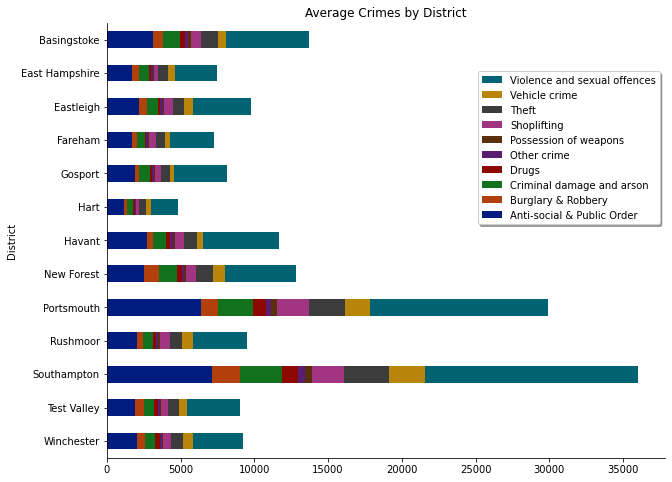

In [307]:
# Plot the data
fig, ax = plt.subplots(figsize = (10,8))
crime_district_pivot.plot(ax = ax, kind = 'barh', stacked = True)

# Title
plt.title("Average Crimes by District")

# Remove frames
ax.spines[['right', 'top']].set_visible(False)

ax.invert_yaxis()

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='upper right', bbox_to_anchor=(1.0, 0.9),
          ncol=1, fancybox=True, shadow=True);

We can see that the largest offences are reported in the two largest towns/cities in Hampshire, Portsmouth and Southampton with violence and sexual offences being the largest category. The lowest number of crimes is reported in Hart, a rural district.

In [308]:
# Add total crimes by district column
crime_district_pivot['Total']=crime_district_pivot.sum(axis = 1)

# Add the population from the 2021 census for each district

crime_district_pivot.insert(11, "Pop", [185200,125700,136400,114500,
                                       81900,99400,124200,175800,
                                       208100,99800,249000,130500,127500],True)

# Add crimes per head
crime_district_pivot['Crimes per head'] = crime_district_pivot['Total']/crime_district_pivot['Pop']*1000

In [309]:
crime_district_pivot.sort_values(by = 'Crimes per head',ascending = False)

Crime type      Anti-social & Public Order  Burglary & Robbery  \
District                                                         
Southampton                         7123.5              1908.5   
Portsmouth                          6380.5              1186.5   
Gosport                             1936.5               267.5   
Rushmoor                            2060.5               374.0   
Havant                              2717.5               386.0   
Basingstoke                         3106.5               695.5   
New Forest                          2531.0               987.0   
Winchester                          2076.0               504.0   
Eastleigh                           2201.0               519.5   
Test Valley                         1927.0               610.5   
Fareham                             1720.5               292.5   
East Hampshire                      1693.0               491.0   
Hart                                1134.0               264.0   

Crime type      Criminal damage and arson   Drugs  Other crime  \
District                                                         
Southampton                        2839.0  1100.0        444.0   
Portsmouth                         2337.5   862.0        343.5   
Gosport                             690.5   172.5        111.5   
Rushmoor                            687.0   237.5        120.0   
Havant                              927.0   263.0        172.5   
Basingstoke                        1166.0   339.0        222.5   
New Forest                         1271.5   301.0        173.0   
Winchester                          692.0   310.0        172.5   
Eastleigh                           745.5   173.0        143.5   
Test Valley                         660.0   241.0        137.5   
Fareham                             542.0   127.5         97.5   
East Hampshire                      647.0   170.5        103.5   
Hart                                402.0    95.5         70.5   

Crime type      Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                    
Southampton                     486.5       2191.5  3027.0         2452.0   
Portsmouth                      417.5       2183.5  2408.5         1740.5   
Gosport                          90.0        409.5   604.5          279.0   
Rushmoor                        108.5        694.5   832.5          712.0   
Havant                          128.0        671.5   826.0          436.0   
Basingstoke                     159.0        690.5  1136.5          565.0   
New Forest                      123.5        677.5  1159.5          795.5   
Winchester                       78.0        519.0   839.0          619.0   
Eastleigh                        87.0        596.5   785.0          619.5   
Test Valley                      86.0        475.5   755.0          529.0   
Fareham                          63.0        485.5   601.0          386.0   
East Hampshire                   60.5        321.0   664.5          497.5   
Hart                             44.5        142.5   484.0          338.0   

Crime type      Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                        
Southampton                          14460.0  36032.0  249000       144.706827  
Portsmouth                           12021.0  29881.0  208100       143.589620  
Gosport                               3571.5   8133.0   81900        99.304029  
Rushmoor                              3696.0   9522.5   99800        95.415832  
Havant                                5169.0  11696.5  124200        94.174718  
Basingstoke                           5656.5  13737.0  185200        74.173866  
New Forest                            4797.5  12817.0  175800        72.906712  
Winchester                            3417.5   9227.0  127500        72.368627  
Eastleigh                             3916.0   9786.

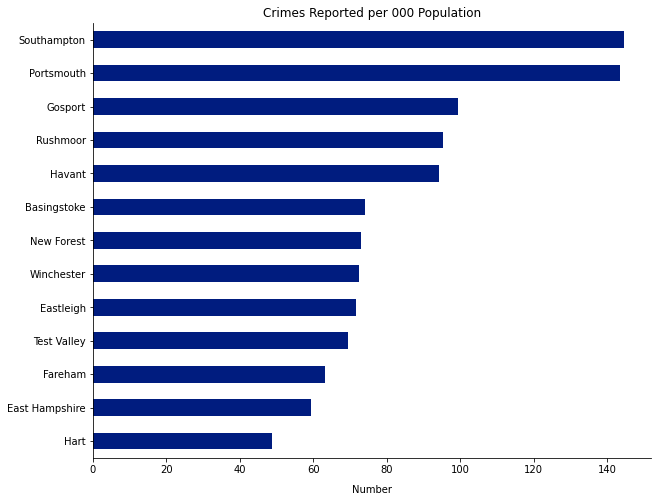

In [310]:
# Plot the data
fig, ax = plt.subplots(figsize = (10,8))
crime_district_pivot['Crimes per head'].sort_values(ascending = False).plot(ax = ax, kind = 'barh')

ax.invert_yaxis()
plt.title('Crimes Reported per 000 Population')
plt.xlabel('Number', labelpad = 10)
plt.ylabel("")

# Remove frames
ax.spines[['right', 'top']].set_visible(False)

* On average Southampton has just over 36000 crimes reported per year. When expressed per head of population, this equates to 140 crimes per 000 population of which 40% is violent and sexual offences. 
* For Portsmouth, the picture is similar with a slightly lower number of crimes with a smaller population resulting in 140 reported crimes per 000 population.
* The lowest reported crimes per head is in the district of Hart at just under 50 crimes per 000 population
* It appears that the two largest connurbations also have the highest crime levels per head

## Relationship between crimes

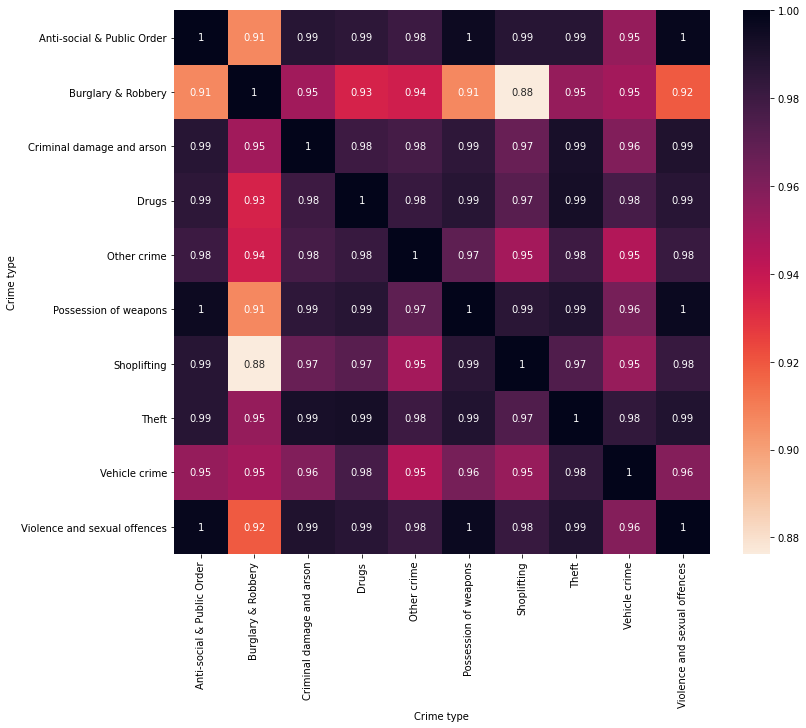

In [360]:
crime_corr = crime_district_pivot.iloc[:,0:10].corr()

# Lets look at a heatmap
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(crime_corr, annot = True, cmap = cmap);

There is pretty strong correlation between different types of crime being reported in a district. This is what we might expect. For example drugs offences are highly positively correlated with theft, violence, possession of weapons and anti-social behaviour. Shoplifting and burglary are less highly correlated.

## What are the hotspots for particular crimes?

Look at the top three districts for each type of crime reported. We might expect Southampton, Portsmouth and Basingstoke to be the highest on all crimes but there may be some differences in the results.

In [311]:
# Sort the table by each crime in descending order and take the top 3
for i in crime_district_pivot.columns[0:10]:
    r = crime_district_pivot.sort_values(by = i,ascending = False).head(10)
    display(r)

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
Basingstoke                      3106.5               695.5   
Havant                           2717.5               386.0   
New Forest                       2531.0               987.0   
Eastleigh                        2201.0               519.5   
Winchester                       2076.0               504.0   
Rushmoor                         2060.5               374.0   
Gosport                          1936.5               267.5   
Test Valley                      1927.0               610.5   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
Basingstoke                     1166.0   339.0        222.5   
Havant                           927.0   263.0        172.5   
New Forest                      1271.5   301.0        173.0   
Eastleigh                        745.5   173.0        143.5   
Winchester                       692.0   310.0        172.5   
Rushmoor                         687.0   237.5        120.0   
Gosport                          690.5   172.5        111.5   
Test Valley                      660.0   241.0        137.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
Basingstoke                  159.0        690.5  1136.5          565.0   
Havant                       128.0        671.5   826.0          436.0   
New Forest                   123.5        677.5  1159.5          795.5   
Eastleigh                     87.0        596.5   785.0          619.5   
Winchester                    78.0        519.0   839.0          619.0   
Rushmoor                     108.5        694.5   832.5          712.0   
Gosport                       90.0        409.5   604.5          279.0   
Test Valley                   86.0        475.5   755.0          529.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
Basingstoke                        5656.5  13737.0  185200        74.173866  
Havant                             5169.0  11696.5  124200        94.174718  
New Forest                         4797.5  12817.0  175800        72.906712  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Winchester                         3417.5   9227.0  127500        72.368627  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Gosport                            3571.5   8133.0   81900        99.304029  
Test Valley                        3634.5   9056.0  130500        69.394636

Crime type      Anti-social & Public Order  Burglary & Robbery  \
District                                                         
Southampton                         7123.5              1908.5   
Portsmouth                          6380.5              1186.5   
New Forest                          2531.0               987.0   
Basingstoke                         3106.5               695.5   
Test Valley                         1927.0               610.5   
Eastleigh                           2201.0               519.5   
Winchester                          2076.0               504.0   
East Hampshire                      1693.0               491.0   
Havant                              2717.5               386.0   
Rushmoor                            2060.5               374.0   

Crime type      Criminal damage and arson   Drugs  Other crime  \
District                                                         
Southampton                        2839.0  1100.0        444.0   
Portsmouth                         2337.5   862.0        343.5   
New Forest                         1271.5   301.0        173.0   
Basingstoke                        1166.0   339.0        222.5   
Test Valley                         660.0   241.0        137.5   
Eastleigh                           745.5   173.0        143.5   
Winchester                          692.0   310.0        172.5   
East Hampshire                      647.0   170.5        103.5   
Havant                              927.0   263.0        172.5   
Rushmoor                            687.0   237.5        120.0   

Crime type      Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                    
Southampton                     486.5       2191.5  3027.0         2452.0   
Portsmouth                      417.5       2183.5  2408.5         1740.5   
New Forest                      123.5        677.5  1159.5          795.5   
Basingstoke                     159.0        690.5  1136.5          565.0   
Test Valley                      86.0        475.5   755.0          529.0   
Eastleigh                        87.0        596.5   785.0          619.5   
Winchester                       78.0        519.0   839.0          619.0   
East Hampshire                   60.5        321.0   664.5          497.5   
Havant                          128.0        671.5   826.0          436.0   
Rushmoor                        108.5        694.5   832.5          712.0   

Crime type      Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                        
Southampton                          14460.0  36032.0  249000       144.706827  
Portsmouth                           12021.0  29881.0  208100       143.589620  
New Forest                            4797.5  12817.0  175800        72.906712  
Basingstoke                           5656.5  13737.0  185200        74.173866  
Test Valley                           3634.5   9056.0  130500        69.394636  
Eastleigh                             3916.0   9786.5  136400        71.748534  
Winchester                            3417.5   9227.0  127500        72.368627  
East Hampshire                        2820.5   7469.0  125700        59.419252  
Havant                                5169.0  11696.5  124200        94.174718  
Rushmoor                              3696.0   9522.5   99800        95.415832

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
New Forest                       2531.0               987.0   
Basingstoke                      3106.5               695.5   
Havant                           2717.5               386.0   
Eastleigh                        2201.0               519.5   
Winchester                       2076.0               504.0   
Gosport                          1936.5               267.5   
Rushmoor                         2060.5               374.0   
Test Valley                      1927.0               610.5   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
New Forest                      1271.5   301.0        173.0   
Basingstoke                     1166.0   339.0        222.5   
Havant                           927.0   263.0        172.5   
Eastleigh                        745.5   173.0        143.5   
Winchester                       692.0   310.0        172.5   
Gosport                          690.5   172.5        111.5   
Rushmoor                         687.0   237.5        120.0   
Test Valley                      660.0   241.0        137.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
New Forest                   123.5        677.5  1159.5          795.5   
Basingstoke                  159.0        690.5  1136.5          565.0   
Havant                       128.0        671.5   826.0          436.0   
Eastleigh                     87.0        596.5   785.0          619.5   
Winchester                    78.0        519.0   839.0          619.0   
Gosport                       90.0        409.5   604.5          279.0   
Rushmoor                     108.5        694.5   832.5          712.0   
Test Valley                   86.0        475.5   755.0          529.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
New Forest                         4797.5  12817.0  175800        72.906712  
Basingstoke                        5656.5  13737.0  185200        74.173866  
Havant                             5169.0  11696.5  124200        94.174718  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Winchester                         3417.5   9227.0  127500        72.368627  
Gosport                            3571.5   8133.0   81900        99.304029  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Test Valley                        3634.5   9056.0  130500        69.394636

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
Basingstoke                      3106.5               695.5   
Winchester                       2076.0               504.0   
New Forest                       2531.0               987.0   
Havant                           2717.5               386.0   
Test Valley                      1927.0               610.5   
Rushmoor                         2060.5               374.0   
Eastleigh                        2201.0               519.5   
Gosport                          1936.5               267.5   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
Basingstoke                     1166.0   339.0        222.5   
Winchester                       692.0   310.0        172.5   
New Forest                      1271.5   301.0        173.0   
Havant                           927.0   263.0        172.5   
Test Valley                      660.0   241.0        137.5   
Rushmoor                         687.0   237.5        120.0   
Eastleigh                        745.5   173.0        143.5   
Gosport                          690.5   172.5        111.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
Basingstoke                  159.0        690.5  1136.5          565.0   
Winchester                    78.0        519.0   839.0          619.0   
New Forest                   123.5        677.5  1159.5          795.5   
Havant                       128.0        671.5   826.0          436.0   
Test Valley                   86.0        475.5   755.0          529.0   
Rushmoor                     108.5        694.5   832.5          712.0   
Eastleigh                     87.0        596.5   785.0          619.5   
Gosport                       90.0        409.5   604.5          279.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
Basingstoke                        5656.5  13737.0  185200        74.173866  
Winchester                         3417.5   9227.0  127500        72.368627  
New Forest                         4797.5  12817.0  175800        72.906712  
Havant                             5169.0  11696.5  124200        94.174718  
Test Valley                        3634.5   9056.0  130500        69.394636  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Gosport                            3571.5   8133.0   81900        99.304029

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
Basingstoke                      3106.5               695.5   
New Forest                       2531.0               987.0   
Havant                           2717.5               386.0   
Winchester                       2076.0               504.0   
Eastleigh                        2201.0               519.5   
Test Valley                      1927.0               610.5   
Rushmoor                         2060.5               374.0   
Gosport                          1936.5               267.5   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
Basingstoke                     1166.0   339.0        222.5   
New Forest                      1271.5   301.0        173.0   
Havant                           927.0   263.0        172.5   
Winchester                       692.0   310.0        172.5   
Eastleigh                        745.5   173.0        143.5   
Test Valley                      660.0   241.0        137.5   
Rushmoor                         687.0   237.5        120.0   
Gosport                          690.5   172.5        111.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
Basingstoke                  159.0        690.5  1136.5          565.0   
New Forest                   123.5        677.5  1159.5          795.5   
Havant                       128.0        671.5   826.0          436.0   
Winchester                    78.0        519.0   839.0          619.0   
Eastleigh                     87.0        596.5   785.0          619.5   
Test Valley                   86.0        475.5   755.0          529.0   
Rushmoor                     108.5        694.5   832.5          712.0   
Gosport                       90.0        409.5   604.5          279.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
Basingstoke                        5656.5  13737.0  185200        74.173866  
New Forest                         4797.5  12817.0  175800        72.906712  
Havant                             5169.0  11696.5  124200        94.174718  
Winchester                         3417.5   9227.0  127500        72.368627  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Test Valley                        3634.5   9056.0  130500        69.394636  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Gosport                            3571.5   8133.0   81900        99.304029

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
Basingstoke                      3106.5               695.5   
Havant                           2717.5               386.0   
New Forest                       2531.0               987.0   
Rushmoor                         2060.5               374.0   
Gosport                          1936.5               267.5   
Eastleigh                        2201.0               519.5   
Test Valley                      1927.0               610.5   
Winchester                       2076.0               504.0   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
Basingstoke                     1166.0   339.0        222.5   
Havant                           927.0   263.0        172.5   
New Forest                      1271.5   301.0        173.0   
Rushmoor                         687.0   237.5        120.0   
Gosport                          690.5   172.5        111.5   
Eastleigh                        745.5   173.0        143.5   
Test Valley                      660.0   241.0        137.5   
Winchester                       692.0   310.0        172.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
Basingstoke                  159.0        690.5  1136.5          565.0   
Havant                       128.0        671.5   826.0          436.0   
New Forest                   123.5        677.5  1159.5          795.5   
Rushmoor                     108.5        694.5   832.5          712.0   
Gosport                       90.0        409.5   604.5          279.0   
Eastleigh                     87.0        596.5   785.0          619.5   
Test Valley                   86.0        475.5   755.0          529.0   
Winchester                    78.0        519.0   839.0          619.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
Basingstoke                        5656.5  13737.0  185200        74.173866  
Havant                             5169.0  11696.5  124200        94.174718  
New Forest                         4797.5  12817.0  175800        72.906712  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Gosport                            3571.5   8133.0   81900        99.304029  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Test Valley                        3634.5   9056.0  130500        69.394636  
Winchester                         3417.5   9227.0  127500        72.368627

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
Rushmoor                         2060.5               374.0   
Basingstoke                      3106.5               695.5   
New Forest                       2531.0               987.0   
Havant                           2717.5               386.0   
Eastleigh                        2201.0               519.5   
Winchester                       2076.0               504.0   
Fareham                          1720.5               292.5   
Test Valley                      1927.0               610.5   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
Rushmoor                         687.0   237.5        120.0   
Basingstoke                     1166.0   339.0        222.5   
New Forest                      1271.5   301.0        173.0   
Havant                           927.0   263.0        172.5   
Eastleigh                        745.5   173.0        143.5   
Winchester                       692.0   310.0        172.5   
Fareham                          542.0   127.5         97.5   
Test Valley                      660.0   241.0        137.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
Rushmoor                     108.5        694.5   832.5          712.0   
Basingstoke                  159.0        690.5  1136.5          565.0   
New Forest                   123.5        677.5  1159.5          795.5   
Havant                       128.0        671.5   826.0          436.0   
Eastleigh                     87.0        596.5   785.0          619.5   
Winchester                    78.0        519.0   839.0          619.0   
Fareham                       63.0        485.5   601.0          386.0   
Test Valley                   86.0        475.5   755.0          529.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Basingstoke                        5656.5  13737.0  185200        74.173866  
New Forest                         4797.5  12817.0  175800        72.906712  
Havant                             5169.0  11696.5  124200        94.174718  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Winchester                         3417.5   9227.0  127500        72.368627  
Fareham                            2930.0   7245.5  114500        63.279476  
Test Valley                        3634.5   9056.0  130500        69.394636

Crime type      Anti-social & Public Order  Burglary & Robbery  \
District                                                         
Southampton                         7123.5              1908.5   
Portsmouth                          6380.5              1186.5   
New Forest                          2531.0               987.0   
Basingstoke                         3106.5               695.5   
Winchester                          2076.0               504.0   
Rushmoor                            2060.5               374.0   
Havant                              2717.5               386.0   
Eastleigh                           2201.0               519.5   
Test Valley                         1927.0               610.5   
East Hampshire                      1693.0               491.0   

Crime type      Criminal damage and arson   Drugs  Other crime  \
District                                                         
Southampton                        2839.0  1100.0        444.0   
Portsmouth                         2337.5   862.0        343.5   
New Forest                         1271.5   301.0        173.0   
Basingstoke                        1166.0   339.0        222.5   
Winchester                          692.0   310.0        172.5   
Rushmoor                            687.0   237.5        120.0   
Havant                              927.0   263.0        172.5   
Eastleigh                           745.5   173.0        143.5   
Test Valley                         660.0   241.0        137.5   
East Hampshire                      647.0   170.5        103.5   

Crime type      Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                    
Southampton                     486.5       2191.5  3027.0         2452.0   
Portsmouth                      417.5       2183.5  2408.5         1740.5   
New Forest                      123.5        677.5  1159.5          795.5   
Basingstoke                     159.0        690.5  1136.5          565.0   
Winchester                       78.0        519.0   839.0          619.0   
Rushmoor                        108.5        694.5   832.5          712.0   
Havant                          128.0        671.5   826.0          436.0   
Eastleigh                        87.0        596.5   785.0          619.5   
Test Valley                      86.0        475.5   755.0          529.0   
East Hampshire                   60.5        321.0   664.5          497.5   

Crime type      Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                        
Southampton                          14460.0  36032.0  249000       144.706827  
Portsmouth                           12021.0  29881.0  208100       143.589620  
New Forest                            4797.5  12817.0  175800        72.906712  
Basingstoke                           5656.5  13737.0  185200        74.173866  
Winchester                            3417.5   9227.0  127500        72.368627  
Rushmoor                              3696.0   9522.5   99800        95.415832  
Havant                                5169.0  11696.5  124200        94.174718  
Eastleigh                             3916.0   9786.5  136400        71.748534  
Test Valley                           3634.5   9056.0  130500        69.394636  
East Hampshire                        2820.5   7469.0  125700        59.419252

Crime type      Anti-social & Public Order  Burglary & Robbery  \
District                                                         
Southampton                         7123.5              1908.5   
Portsmouth                          6380.5              1186.5   
New Forest                          2531.0               987.0   
Rushmoor                            2060.5               374.0   
Eastleigh                           2201.0               519.5   
Winchester                          2076.0               504.0   
Basingstoke                         3106.5               695.5   
Test Valley                         1927.0               610.5   
East Hampshire                      1693.0               491.0   
Havant                              2717.5               386.0   

Crime type      Criminal damage and arson   Drugs  Other crime  \
District                                                         
Southampton                        2839.0  1100.0        444.0   
Portsmouth                         2337.5   862.0        343.5   
New Forest                         1271.5   301.0        173.0   
Rushmoor                            687.0   237.5        120.0   
Eastleigh                           745.5   173.0        143.5   
Winchester                          692.0   310.0        172.5   
Basingstoke                        1166.0   339.0        222.5   
Test Valley                         660.0   241.0        137.5   
East Hampshire                      647.0   170.5        103.5   
Havant                              927.0   263.0        172.5   

Crime type      Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                    
Southampton                     486.5       2191.5  3027.0         2452.0   
Portsmouth                      417.5       2183.5  2408.5         1740.5   
New Forest                      123.5        677.5  1159.5          795.5   
Rushmoor                        108.5        694.5   832.5          712.0   
Eastleigh                        87.0        596.5   785.0          619.5   
Winchester                       78.0        519.0   839.0          619.0   
Basingstoke                     159.0        690.5  1136.5          565.0   
Test Valley                      86.0        475.5   755.0          529.0   
East Hampshire                   60.5        321.0   664.5          497.5   
Havant                          128.0        671.5   826.0          436.0   

Crime type      Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                        
Southampton                          14460.0  36032.0  249000       144.706827  
Portsmouth                           12021.0  29881.0  208100       143.589620  
New Forest                            4797.5  12817.0  175800        72.906712  
Rushmoor                              3696.0   9522.5   99800        95.415832  
Eastleigh                             3916.0   9786.5  136400        71.748534  
Winchester                            3417.5   9227.0  127500        72.368627  
Basingstoke                           5656.5  13737.0  185200        74.173866  
Test Valley                           3634.5   9056.0  130500        69.394636  
East Hampshire                        2820.5   7469.0  125700        59.419252  
Havant                                5169.0  11696.5  124200        94.174718

Crime type   Anti-social & Public Order  Burglary & Robbery  \
District                                                      
Southampton                      7123.5              1908.5   
Portsmouth                       6380.5              1186.5   
Basingstoke                      3106.5               695.5   
Havant                           2717.5               386.0   
New Forest                       2531.0               987.0   
Eastleigh                        2201.0               519.5   
Rushmoor                         2060.5               374.0   
Test Valley                      1927.0               610.5   
Gosport                          1936.5               267.5   
Winchester                       2076.0               504.0   

Crime type   Criminal damage and arson   Drugs  Other crime  \
District                                                      
Southampton                     2839.0  1100.0        444.0   
Portsmouth                      2337.5   862.0        343.5   
Basingstoke                     1166.0   339.0        222.5   
Havant                           927.0   263.0        172.5   
New Forest                      1271.5   301.0        173.0   
Eastleigh                        745.5   173.0        143.5   
Rushmoor                         687.0   237.5        120.0   
Test Valley                      660.0   241.0        137.5   
Gosport                          690.5   172.5        111.5   
Winchester                       692.0   310.0        172.5   

Crime type   Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District                                                                 
Southampton                  486.5       2191.5  3027.0         2452.0   
Portsmouth                   417.5       2183.5  2408.5         1740.5   
Basingstoke                  159.0        690.5  1136.5          565.0   
Havant                       128.0        671.5   826.0          436.0   
New Forest                   123.5        677.5  1159.5          795.5   
Eastleigh                     87.0        596.5   785.0          619.5   
Rushmoor                     108.5        694.5   832.5          712.0   
Test Valley                   86.0        475.5   755.0          529.0   
Gosport                       90.0        409.5   604.5          279.0   
Winchester                    78.0        519.0   839.0          619.0   

Crime type   Violence and sexual offences    Total     Pop  Crimes per head  
District                                                                     
Southampton                       14460.0  36032.0  249000       144.706827  
Portsmouth                        12021.0  29881.0  208100       143.589620  
Basingstoke                        5656.5  13737.0  185200        74.173866  
Havant                             5169.0  11696.5  124200        94.174718  
New Forest                         4797.5  12817.0  175800        72.906712  
Eastleigh                          3916.0   9786.5  136400        71.748534  
Rushmoor                           3696.0   9522.5   99800        95.415832  
Test Valley                        3634.5   9056.0  130500        69.394636  
Gosport                            3571.5   8133.0   81900        99.304029  
Winchester                         3417.5   9227.0  127500        72.368627

#### Crime categories where other districts feature

* Burglary & Robbery/Criminal damage and arson/Theft/Vehicle crime - New Forest 3rd place
* Shoplifting - Rushmoor 3rd place

The New Forest is an area that receives a lot of visitors and there are a lot of expensive homes in this district too. This could explain it being a hotspot for these types of crimes

Rushmoor encompasses the towns of Farnborough and Aldershot, both military areas but it is not clear why it appears in third place for shoplifting

Lets plot this on a map. We are using the full dataframe here with latitude and longitude and crimes cover the two year period of 2022 and 2023.

In [312]:
# Map these crimes on a map of England and Wales (2022 and 2023)

lat = df_filtered['Latitude'].to_list()
long = df_filtered['Longitude'].to_list()

crime_map = folium.Map([50.9, -1.08], zoom_start=9)

heatmap = plugins.HeatMap(list(zip(lat,long)),radius = 2, blur = 1)
crime_map.add_child(heatmap)

We can clearly see the hotspots in Hampshire on the map and these are clustered around the major connurbations as we might expect

In [313]:
# Lets have a closer look at Havant (2022 and 2023)

hav = df_filtered[df_filtered['District']=='Havant']

# Map these crimes on a map of England and Wales

lat = hav['Latitude'].to_list()
long = hav['Longitude'].to_list()

crime_map = folium.Map([50.9, -0.95], zoom_start=12)

heatmap = plugins.HeatMap(list(zip(lat,long)),radius = 3, blur = 1)
crime_map.add_child(heatmap)

There are some hotspot areas in the Havant district that we can narrow down to locations

In [314]:
hav.groupby(['LSOA code'], as_index = False)['Year'].count().sort_values(by = 'Year', ascending = False).head()

LSOA code  Year
71  E01022973  1307
51  E01022953  1172
6   E01022905   934
4   E01022903   772
15  E01022915   718

There are a couple of locations of interest

In [315]:
# Look at the first location -crimes over the two year period
hav[hav['LSOA code']=='E01022973'].groupby('Crime type',as_index = False)['Year'].count().sort_values(by = 'Year', ascending = False)

Crime type  Year
9  Violence and sexual offences   363
0    Anti-social & Public Order   351
6                   Shoplifting   306
7                         Theft   111
2     Criminal damage and arson    68
1            Burglary & Robbery    50
5         Possession of weapons    22
3                         Drugs    20
8                 Vehicle crime    14
4                   Other crime     2

We can see that most of these involve violence and sexual offences, followed by anti-social and public order and shoplifting. We could try to narrow this down a little more.

In [316]:
# Lets have a closer look at Havant (2022 and 2023)

E01022973 = hav[hav['LSOA code']=='E01022973']

# Map these crimes on a map of England and Wales

lat = E01022973['Latitude'].to_list()
long = E01022973['Longitude'].to_list()

crime_map = folium.Map([50.88, -1.02], zoom_start=15)

heatmap = plugins.HeatMap(list(zip(lat,long)),radius = 10, blur = 1)
crime_map.add_child(heatmap)

This LSOA is actually in Waterlooville, a nearby town to Havant but in the Havant and Waterlooville District

In [317]:
# Look at the first location -crimes over the two year period
E01022973.groupby('Location',as_index = False)['Year'].count().sort_values(by = 'Year', ascending = False).head()

Location  Year
0                On or near    281
25    On or near Supermarket   167
26     On or near Swiss Road   121
2   On or near Aysgarth Road   114
20  On or near Portland Road   105

This first line doesn't provide much information, although we can see a couple of locations of interest which are around the central town shopping area

In [318]:
# Look at the other LSOA
hav[hav['LSOA code']=='E01022953'].groupby('Crime type',as_index = False)['Year'].count().sort_values(by = 'Year', ascending = False)

Crime type  Year
0    Anti-social & Public Order   338
9  Violence and sexual offences   321
6                   Shoplifting   222
7                         Theft   115
2     Criminal damage and arson    69
1            Burglary & Robbery    40
8                 Vehicle crime    30
3                         Drugs    22
5         Possession of weapons    12
4                   Other crime     3

In this area, anti-social and public order offences are the top reported crime. Again, violence and shoplifting are also top reported crimes for this LSOA.

In [319]:
# Lets have a closer look at Havant (2022 and 2023)

E01022953 = hav[hav['LSOA code']=='E01022953']

# Map these crimes on a map of England and Wales

lat = E01022953['Latitude'].to_list()
long = E01022953['Longitude'].to_list()

crime_map = folium.Map([50.8518, -0.98], zoom_start=15)

heatmap = plugins.HeatMap(list(zip(lat,long)),radius = 10, blur = 1)
crime_map.add_child(heatmap)

In [320]:
# Look at the first location -crimes over the two year period
E01022953.groupby('Location',as_index = False)['Year'].count().sort_values(by = 'Year', ascending = False).head()

Location  Year
0                    On or near    366
31      On or near Shopping Area    70
5        On or near Bulbeck Road    68
18      On or near Market Parade    67
6   On or near Bus/Coach Station    65

As before, there is not much information regarding the location name but we can see from the map the hotpspot areas which are again focussed primarily on the shopping centre areas

## Economic Indicators

It might be interesting to have a look at some other economic indicators such as unemployment rates, median incomes or education to try to build up a picture by district and see if there are any obvious links between crime rate and other factors. From this we might be able to build up a model.

We will look at:

* Unemployment figures
* Median household income
* Population density

In [321]:
# Read in some other indicators
eco = pd.read_csv(r'C:\Users\imoge\Downloads\EconomicHants.csv')
eco

Unnamed: 0  med_salary  unemp_rate  Land_area
0      Basingstoke     39000.0         3.3     633.80
1   East Hampshire     33000.0         3.1     514.40
2        Eastleigh     34400.0         2.3      80.00
3          Fareham     35800.0         2.4      74.20
4          Gosport     32100.0         3.4      25.29
5             Hart     39300.0         3.0     215.30
6           Havant     32900.0         4.0      55.30
7       New Forest     34600.0         2.9     753.20
8       Portsmouth     35200.0         3.8      40.25
9         Rushmoor     38400.0         3.0      39.00
10     Southampton     35700.0         4.6      72.80
11     Test Valley     35100.0         2.3     627.60
12      Winchester     37100.0         3.0     660.97
13             NaN         NaN         NaN        NaN
14             NaN         NaN         NaN        NaN
15             NaN         NaN         NaN        NaN

In [322]:
# Drop the last few rows
eco = eco.iloc[0:13,:]

# Rename the first column
eco.rename(columns = {'Unnamed: 0':'District Name'}, inplace = True)

In [323]:
# Check the datatypes
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District Name  13 non-null     object 
 1   med_salary     13 non-null     float64
 2   unemp_rate     13 non-null     float64
 3   Land_area      13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 544.0+ bytes


In [344]:
# Merge with the economic indicators
crime_district_all = crime_district_pivot.merge(eco, left_on = 'District', right_on = 'District Name')

In [345]:
# Add column for population density
crime_district_all['Pop_density']= crime_district_all['Pop']/crime_district_all['Land_area']

In [346]:
# Set the names of districts as index
crime_district_all.set_index('District Name', inplace = True)

In [347]:
# Drop columns not wanted
crime_district_all.drop(columns = ['Land_area','Pop'],axis = 1, inplace = True)

In [348]:
# Check head
crime_district_all.head()

Anti-social & Public Order  Burglary & Robbery  \
District Name                                                    
Basingstoke                         3106.5               695.5   
East Hampshire                      1693.0               491.0   
Eastleigh                           2201.0               519.5   
Fareham                             1720.5               292.5   
Gosport                             1936.5               267.5   

                Criminal damage and arson  Drugs  Other crime  \
District Name                                                   
Basingstoke                        1166.0  339.0        222.5   
East Hampshire                      647.0  170.5        103.5   
Eastleigh                           745.5  173.0        143.5   
Fareham                             542.0  127.5         97.5   
Gosport                             690.5  172.5        111.5   

                Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District Name                                                               
Basingstoke                     159.0        690.5  1136.5          565.0   
East Hampshire                   60.5        321.0   664.5          497.5   
Eastleigh                        87.0        596.5   785.0          619.5   
Fareham                          63.0        485.5   601.0          386.0   
Gosport                          90.0        409.5   604.5          279.0   

                Violence and sexual offences    Total  Crimes per head  \
District Name                                                            
Basingstoke                           5656.5  13737.0        74.173866   
East Hampshire                        2820.5   7469.0        59.419252   
Eastleigh                             3916.0   9786.5        71.748534   
Fareham                               2930.0   7245.5        63.279476   
Gosport                               3571.5   8133.0        99.304029   

                med_salary  unemp_rate  Pop_density  
District Name                                        
Basingstoke        39000.0         3.3   292.205743  
East Hampshire     33000.0         3.1   244.362364  
Eastleigh          34400.0         2.3  1705.000000  
Fareham            35800.0         2.4  1543.126685  
Gosport            32100.0         3.4  3238.434164

Lets try clustering on this data

In [366]:
# Create new dataframe, drop the total column and shuffle
df_cluster = crime_district_all.drop(columns = ['Total'],axis = 1).sample(frac = 1)

In [367]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [368]:
object = StandardScaler()
standard = object.fit_transform(df_cluster)
standard

array([[-0.96143664, -0.86585118, -0.91810713, -0.84553368, -1.05568411,
        -0.78052694, -1.01430196, -0.82536882, -0.71463597, -0.9350664 ,
        -1.27359047,  1.66752106, -0.2490138 , -0.77668983],
       [-0.62618367, -0.8023834 , -0.71873296, -0.73390499, -0.79015554,
        -0.64183708, -0.46314763, -0.66505903, -0.63464801, -0.64195045,
        -0.76983071,  0.09666789, -1.17392221, -0.0727904 ],
       [-0.42297408, -0.33138572, -0.50511777, -0.0972726 , -0.05257617,
        -0.52938584, -0.40931769, -0.33895877, -0.24637315, -0.50579607,
        -0.45255361,  0.68012764, -0.2490138 , -0.95163741],
       [-0.50271455, -0.85805689, -0.50725392, -0.57692714, -0.65247406,
        -0.43942485, -0.58526929, -0.66026344, -0.81295449, -0.46278525,
         0.48768666, -1.56394832,  0.3675918 ,  1.03066435],
       [-0.16288866,  0.74422602,  0.32014892, -0.12866817, -0.04765897,
        -0.18828374, -0.15462975,  0.10018044,  0.04774922, -0.12037444,
        -0.43377056, -0.44

2


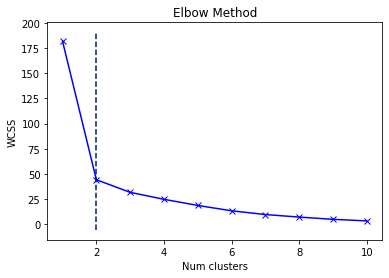

In [369]:
# Plot the point where the curve starts to flatten
from kneed import KneeLocator

y = wcss
x = range(1, len(y)+1)
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

plt.plot(range(1,11), wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Num clusters')
plt.ylabel('WCSS')

plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed');

In [370]:
# Run kmeans with 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
mod1 = kmeans.fit_predict(standard)
mod1 = mod1+1
mod1

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2])

In [371]:
# Create cluster column
cluster = list(mod1)
df_cluster['Cluster']=cluster
df_cluster

Anti-social & Public Order  Burglary & Robbery  \
District Name                                                    
Hart                                1134.0               264.0   
Fareham                             1720.5               292.5   
Winchester                          2076.0               504.0   
Gosport                             1936.5               267.5   
New Forest                          2531.0               987.0   
Eastleigh                           2201.0               519.5   
Southampton                         7123.5              1908.5   
East Hampshire                      1693.0               491.0   
Basingstoke                         3106.5               695.5   
Portsmouth                          6380.5              1186.5   
Test Valley                         1927.0               610.5   
Havant                              2717.5               386.0   
Rushmoor                            2060.5               374.0   

                Criminal damage and arson   Drugs  Other crime  \
District Name                                                    
Hart                                402.0    95.5         70.5   
Fareham                             542.0   127.5         97.5   
Winchester                          692.0   310.0        172.5   
Gosport                             690.5   172.5        111.5   
New Forest                         1271.5   301.0        173.0   
Eastleigh                           745.5   173.0        143.5   
Southampton                        2839.0  1100.0        444.0   
East Hampshire                      647.0   170.5        103.5   
Basingstoke                        1166.0   339.0        222.5   
Portsmouth                         2337.5   862.0        343.5   
Test Valley                         660.0   241.0        137.5   
Havant                              927.0   263.0        172.5   
Rushmoor                            687.0   237.5        120.0   

                Possession of weapons  Shoplifting   Theft  Vehicle crime  \
District Name                                                               
Hart                             44.5        142.5   484.0          338.0   
Fareham                          63.0        485.5   601.0          386.0   
Winchester                       78.0        519.0   839.0          619.0   
Gosport                          90.0        409.5   604.5          279.0   
New Forest                      123.5        677.5  1159.5          795.5   
Eastleigh                        87.0        596.5   785.0          619.5   
Southampton                     486.5       2191.5  3027.0         2452.0   
East Hampshire                   60.5        321.0   664.5          497.5   
Basingstoke                     159.0        690.5  1136.5          565.0   
Portsmouth                      417.5       2183.5  2408.5         1740.5   
Test Valley                      86.0        475.5   755.0          529.0   
Havant                          128.0        671.5   826.0          436.0   
Rushmoor                        108.5        694.5   832.5          712.0   

                Violence and sexual offences  Crimes per head  med_salary  \
District Name                                                               
Hart                                  1880.5        48.848089     39300.0   
Fareham                               2930.0        63.279476     35800.0   
Winchester                            3417.5        72.368627     37100.0   
Gosport                               3571.5        99.304029     32100.0   
New Forest                            4797.5        72.906712     34600.0   
Eastleigh                             3916.0        71.748534     34400.0   
Southampton                          14460.0       144.706827     35700.0   
East Hampshire                        2820.5        59.419252     33000.0   
Basingstoke                           5656.5        74.173866     39000.0   
Portsmouth                     

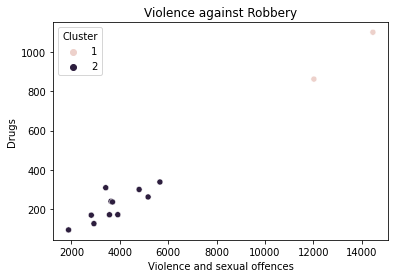

In [374]:
# Plot an example chart
sns.scatterplot(data = df_cluster, x = 'Violence and sexual offences', y = 'Drugs', hue = 'Cluster')
plt.title('Violence against Robbery');

We can see that there is a relationship between these two crimes and two points are well apart from the others

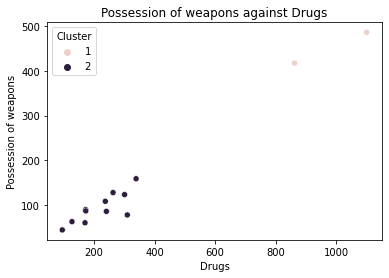

In [375]:
sns.scatterplot(data = df_cluster, x = 'Drugs', y = 'Possession of weapons', hue = 'Cluster')
plt.title('Possession of weapons against Drugs');

The connurbations of Portsmouth and Southampton are quite distinct from the other districts in Hampshire in terms of the level of crimes reported

## Build predictive model for crime based on economic indicators

In [535]:
# Select columns
data = crime_district_all[['Total', 'med_salary','unemp_rate','Pop_density']]
data = data.sample(frac = 1)

In [536]:
# Look at correlations
data.corr()

Total  med_salary  unemp_rate  Pop_density
Total        1.000000   -0.029852    0.737380     0.659380
med_salary  -0.029852    1.000000   -0.122282    -0.254994
unemp_rate   0.737380   -0.122282    1.000000     0.578733
Pop_density  0.659380   -0.254994    0.578733     1.000000

There is a fairly strong correlations between the total crimes and unemployment rate and population density, such that higher population density and unemployment rates are correlated with higher number of crimes. The correlation with median salary is weak negative, such that a higher salary is correlated with a lower crime rate.

We will have a look at the plots

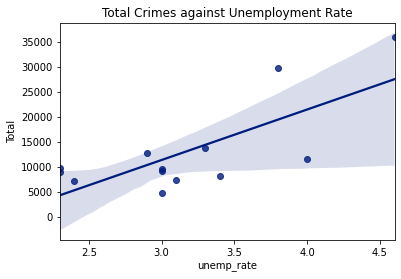

In [537]:
sns.regplot(data = data, x = 'unemp_rate', y = 'Total')
plt.title('Total Crimes against Unemployment Rate');

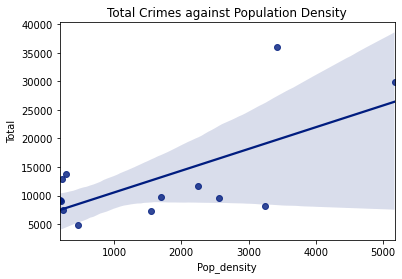

In [538]:
sns.regplot(data = data, x = 'Pop_density', y = 'Total')
plt.title('Total Crimes against Population Density');

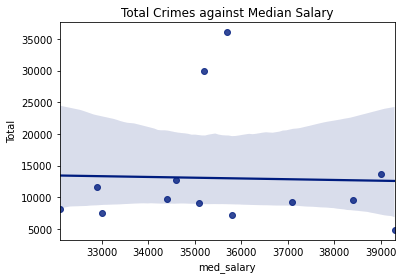

In [539]:
sns.regplot(data = data, x = 'med_salary', y = 'Total')
plt.title('Total Crimes against Median Salary');

We will try to build a model but recognising that we have very few data points so it is unlikely to be a good model. We would need data from across the UK to build something we could rely upon. However, it is interesting to have a look

In [540]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [590]:
# Define X and y
X = data.drop(columns = ['Total'],axis = 1)
y = data["Total"].values # This is the average of 2022 and 2023

In [598]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10, 3) (3, 3) (10,) (3,)


In [599]:
scaler = StandardScaler()

# Fit on training and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [600]:
# Fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [601]:
# Get the values predicted by the model
lr.predict(X_train_scaled)

array([12291.05167966,  2850.71447064, 18223.02372167, 13575.67594071,
        7692.78787499, 10359.12943696,  8249.79247888, 26809.82384805,
        5748.29194478, 14468.20860367])

In [602]:
# Print the coefficients and intercept
print(lr.coef_)
print(lr.intercept_)

[1732.55936373 5651.18996002 1414.26835249]
12026.849999999999


In [603]:
# Get the r-squared score on the training data
lr.score(X_train_scaled,y_train)

0.6010377177730949

Approximately 60% of the variation in crime can be explained by the features of population density, median income and unemployment rate. At least 25% is not explained by our model

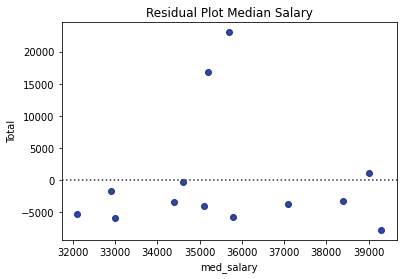

In [604]:
# Residual plot
sns.residplot(data['med_salary'],data['Total'])
plt.title('Residual Plot Median Salary');

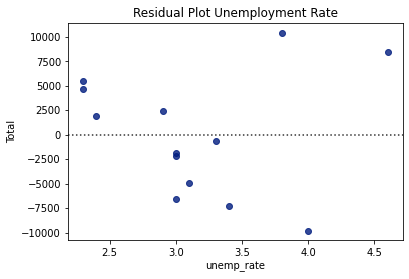

In [605]:
# Residual plot
sns.residplot(data['unemp_rate'],data['Total'])
plt.title('Residual Plot Unemployment Rate');

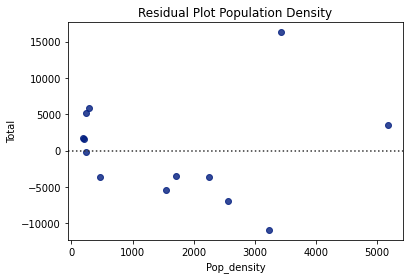

In [606]:
# Residual plot
sns.residplot(data['Pop_density'],data['Total'])
plt.title('Residual Plot Population Density');

We are looking for the residuals to be randomly spread around the X axis. It is a bit difficult to tell, especially with so few points.

In [607]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([21516.69508663, 14007.16717892,  4033.12202615])

''

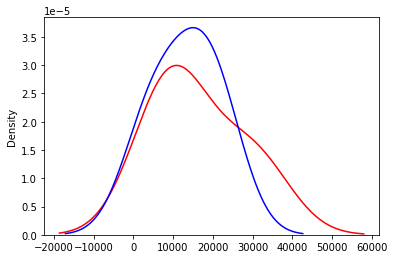

In [608]:
# Kde or distplot, y_pred against 
sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'Predicted Value')
;

In [609]:
# Get mean squared error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  41058398.166453004


In [612]:
# Get r-squared
r_squared = r2_score(y_test, y_pred)
print('The R-square value is: ', r_squared)

The R-square value is:  0.5484378293260583


55% of the change in crime levels can be explained by the model. This is quite a poor predictive model, explaining little more than we would expect by chance. A much bigger sample size would be needed to build a model and make reliable conclusions about crime levels being related to the features we identified and likely a whole host of different predictor variables would be needed making this quite a complicated model.